In [1]:
pip install numpy==1.20

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

C:\Users\aedpu\.conda\envs\s\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aedpu\.conda\envs\s\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\aedpu\.conda\envs\s\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


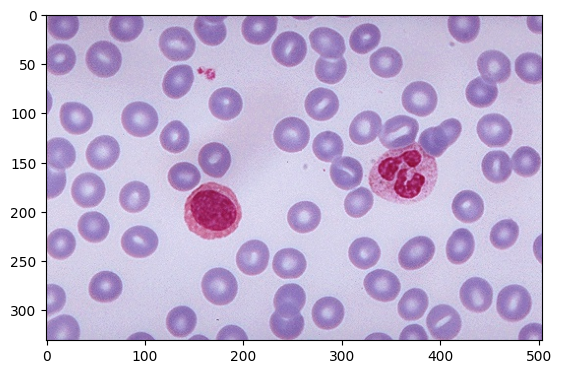

In [81]:
image = cv2.imread("C:\\Users\\aedpu\\Gurubalan Final year\\blood04.jpg")
plt.imshow(image)
plt.show()

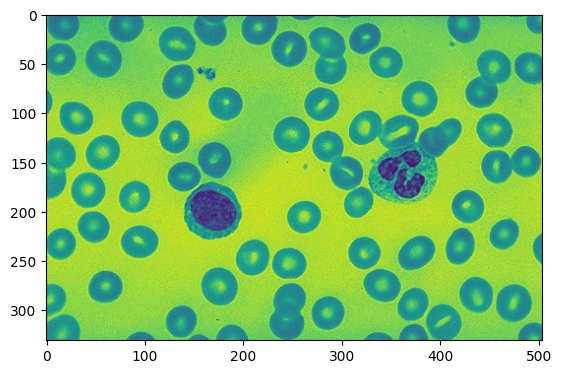

In [82]:
img_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

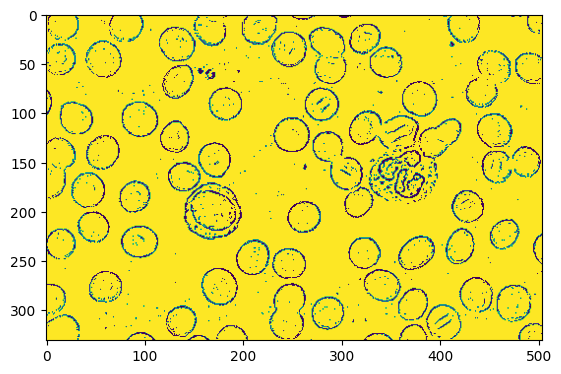

In [91]:
image1 = cv2.medianBlur(img_gray,3)
ath2 = cv2.adaptiveThreshold(image1 , 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
plt.imshow(ath2)
plt.show()

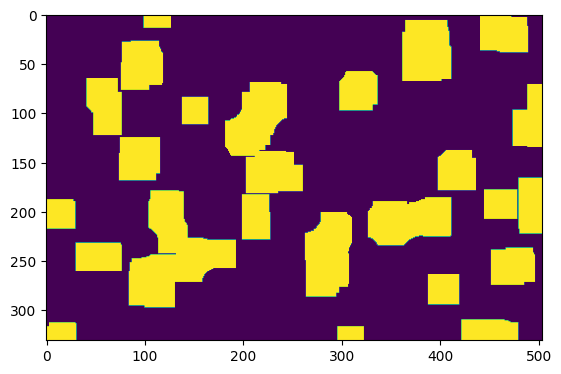

In [92]:
kernal = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(ath2,cv2.MORPH_OPEN,kernal , iterations = 13)
plt.imshow(opening)
plt.show()

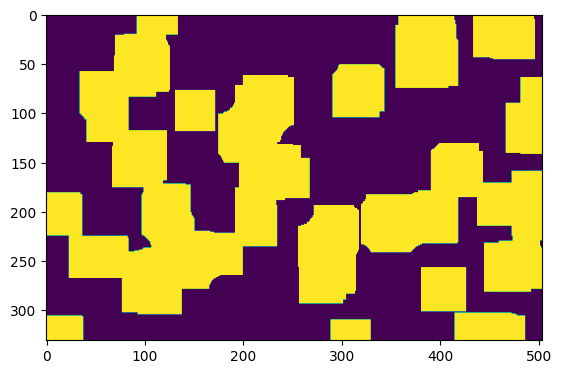

In [93]:
sure_bg = cv2.dilate(opening,kernal,iterations = 7)
plt.imshow(sure_bg)
plt.show()

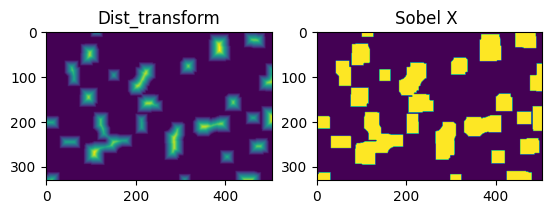

In [94]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2 ,3)
plt.subplot(1,2,1),plt.imshow(dist_transform)
plt.title("Dist_transform")
ret , sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),250 , 0)
plt.subplot(1,2,2),plt.imshow(sure_fg)
plt.title('Sobel X ')
plt.show()

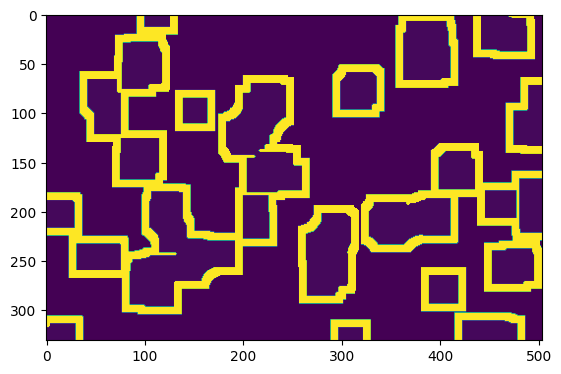

In [95]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

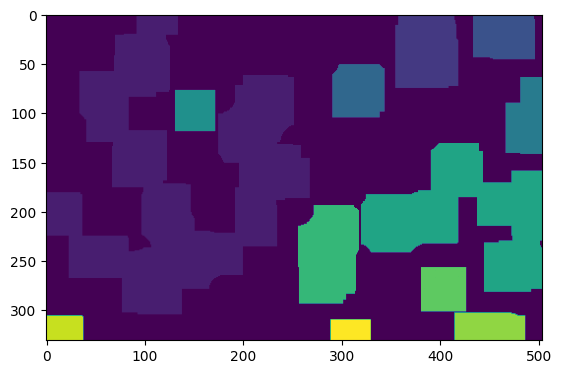

In [96]:
ret , markers = cv2.connectedComponents(sure_bg)
markers = markers+1
plt.imshow(markers)
plt.show()

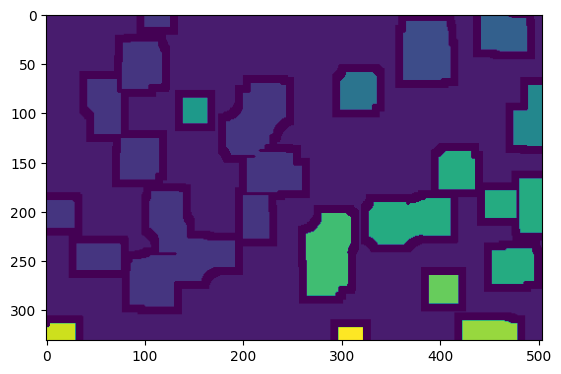

In [97]:
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

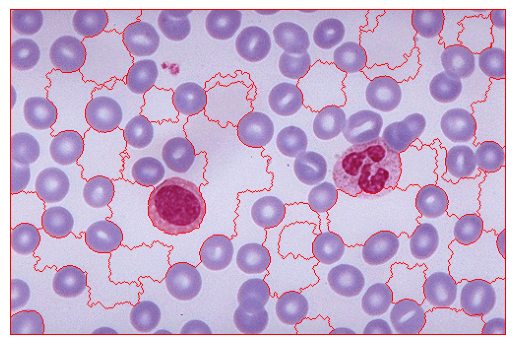

In [98]:
markers = cv2.watershed(image,markers)
image[markers == -1] = (250 , 0 , 0)
plt.imshow(image)
plt.axis('off')
plt.show()